### Implementing the Gradient Descent Algorithm

We'll implement the basic functions of the Gradient Descent algorithm to find the boundary in a small dataset. First, we'll start with some functions that will help us plot and visualize the data.

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('Datasets/LinearRegression/grad_descent_data.csv', header=None)
X = np.array(data.iloc[:,:-1])
y = np.array(data.iloc[:,-1])
data.head()

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [17]:
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

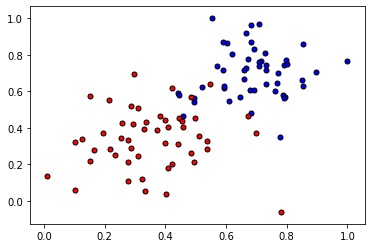

In [18]:
plot_points(X,y);

In [19]:
# Implement Functions:
# sigmoid: The sigmoid activation function.
# output_formula: The formula for the prediction.
# error_formula: The formula for the error at a point.
# update_weights: The function that updates the parameters with one gradient descent step.

# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

# Error (log-loss) formula
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = -(y - output)
    weights -= learnrate * d_error * x
    bias -= learnrate * d_error
    return weights, bias

### Training Function
This function will help us iterate the gradient through all the data, for a number of epochs. It will also plot a data, and some of the boundary lines obtained as we run the algorithm.

In [20]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

### Time to train the algorithm!
When we run the function, we'll obtain the following:

* 10 updates with the current training loss and accuracy
* A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
* A plot of the error function. Notice how it decreases as we go through more epochs.


========== Epoch 0 ==========
Train loss:  0.6619731146290033
Accuracy:  0.62

========== Epoch 10 ==========
Train loss:  0.5897532423461566
Accuracy:  0.66

========== Epoch 20 ==========
Train loss:  0.5303860888972776
Accuracy:  0.78

========== Epoch 30 ==========
Train loss:  0.4833299834800748
Accuracy:  0.85

========== Epoch 40 ==========
Train loss:  0.44556544090744593
Accuracy:  0.88

========== Epoch 50 ==========
Train loss:  0.4147782418517366
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.3892960287860786
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.36790786778423945
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.34972792464141306
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.3340994393525674
Accuracy:  0.93


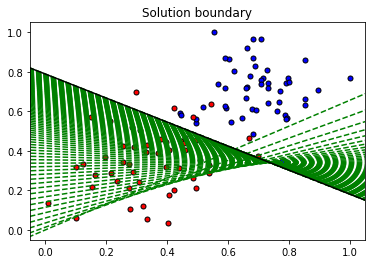

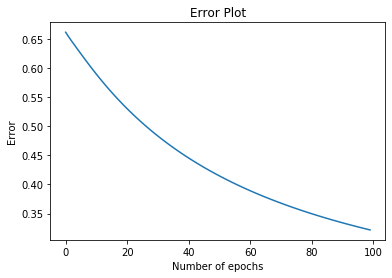

In [22]:
train(X, y, epochs, learnrate, True)

In [25]:
sigmoid(3*0.4 + 5 * 0.6 - 2.2)


0.8807970779778823